# Load data

Here, we load the data in two separate formats: 1) raw, and 2) with counts per million (CPM) normalization. We also extract cell type labels and split the data into training, validation and testing sets.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load dataframes
df_raw = pd.read_csv('../data/v1_raw.csv', header=0, index_col=0, delimiter=',')
df_cpm = pd.read_csv('../data/v1_cpm.csv', header=0, index_col=0, delimiter=',')

In [3]:
# Preview raw
df_raw.head()

,0610007P14Rik,0610009B22Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610012G03Rik,0610030E20Rik,0610037L13Rik,1110001J03Rik,1110004E09Rik,...,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,l7Rn6,cell_types_98,cell_types_50,cell_types_25
LS-15006_S09_E1-50,79.0,140.0,0.0,30.0,114.0,575.0,7.0,108.0,206.0,0.0,...,0.0,0.0,78.0,0.0,36.0,0.0,190.0,Vip Arhgap36 Hmcn1,n70,n66
LS-15006_S10_E1-50,121.0,175.0,181.0,196.0,30.0,318.0,3.0,202.0,48.0,75.0,...,0.0,0.0,28.0,0.0,1.0,29.0,178.0,Lamp5 Lsp1,Lamp5 Lsp1,n78
LS-15006_S11_E1-50,89.0,68.0,100.0,75.0,14.0,170.0,0.0,101.0,88.0,35.0,...,0.0,0.0,153.0,36.0,104.0,21.0,153.0,Lamp5 Lsp1,Lamp5 Lsp1,n78
LS-15006_S12_E1-50,115.0,0.0,35.0,17.0,0.0,193.0,90.0,189.0,117.0,44.0,...,0.0,0.0,31.0,162.0,0.0,30.0,110.0,Vip Crispld2 Htr2c,n65,n64
LS-15006_S13_E1-50,390.0,177.0,0.0,42.0,0.0,23.0,71.0,52.0,162.0,129.0,...,20.0,0.0,85.0,44.0,0.0,9.0,335.0,Lamp5 Plch2 Dock5,n82,n79


In [4]:
# Preview CPM
df_cpm.head()

,0610007P14Rik,0610009B22Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610012G03Rik,0610030E20Rik,0610037L13Rik,1110001J03Rik,1110004E09Rik,...,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,l7Rn6,cell_types_98,cell_types_50,cell_types_25
LS-15006_S09_E1-50,45.645770,80.891235,0.000000,17.333836,65.868576,332.231870,4.044562,62.401810,119.025670,0.000000,...,0.00000,0.0,45.067974,0.000000,20.800604,0.000000,109.780960,Vip Arhgap36 Hmcn1,n70,n66
LS-15006_S10_E1-50,63.363390,91.641266,94.783260,102.638220,15.709931,166.525280,1.570993,105.780205,25.135891,39.274830,...,0.00000,0.0,14.662603,0.000000,0.523664,15.186268,93.212265,Lamp5 Lsp1,Lamp5 Lsp1,n78
LS-15006_S11_E1-50,44.837242,34.257668,50.378925,37.784195,7.053050,85.644170,0.000000,50.882713,44.333454,17.632624,...,0.00000,0.0,77.079760,18.136414,52.394080,10.579575,77.079760,Lamp5 Lsp1,Lamp5 Lsp1,n78
LS-15006_S12_E1-50,50.184307,0.000000,15.273485,7.418550,0.000000,84.222360,39.274673,82.476820,51.057080,19.200953,...,0.00000,0.0,13.527944,70.694410,0.000000,13.091558,48.002380,Vip Crispld2 Htr2c,n65,n64
LS-15006_S13_E1-50,221.910780,100.713356,0.000000,23.898085,0.000000,13.087047,40.399143,29.588104,92.178330,73.401260,...,11.38004,0.0,48.365173,25.036089,0.000000,5.121018,190.615680,Lamp5 Plch2 Dock5,n82,n79


In [5]:
# Extract cell types
cell_types_98 = df_raw['cell_types_98']
cell_types_50 = df_raw['cell_types_50']
cell_types_25 = df_raw['cell_types_25']

# Convert to numerical
cell_types_98_num = pd.Categorical(cell_types_98).codes
cell_types_50_num = pd.Categorical(cell_types_50).codes
cell_types_25_num = pd.Categorical(cell_types_25).codes

In [6]:
# Arrange raw and CPM data
raw = df_raw.values[:, :-3].astype(np.float32)
cpm = df_cpm.values[:, :-3].astype(np.float32)
gene_names = np.array(df_raw.columns)[:-3]

# Generate logarithmized and binarized data
binary = (raw > 0).astype(np.float32)
log = np.log(1 + raw)
logcpm = np.log(1 + cpm)

In [7]:
# For data splitting
n = len(raw)
n_train = int(0.8 * n)
n_test = int(0.1 * n)
all_rows = np.arange(n)
np.random.seed(0)
np.random.shuffle(all_rows)
train_inds = all_rows[:n_train]
val_inds = all_rows[n_train:-n_test]
test_inds = all_rows[-n_test:]
print(f'{n} total examples, {len(train_inds)} training examples, {len(val_inds)} validation examples, {len(test_inds)} test examples')

13349 total examples, 10679 training examples, 1336 validation examples, 1334 test examples


# Run PERSIST

Here, we run PERSIST in its default unsupervised mode: we find a small number of genes whose binarized expression levels can predict log-CPM counts for the genome-wide expression profile.

In [8]:
import torch
import pickle
import numpy as np
import torch.nn as nn
from persist import PERSIST, HurdleLoss, ExpressionDataset

In [9]:
# Set up datasets
train_dataset = ExpressionDataset(binary[train_inds], logcpm[train_inds])
val_dataset = ExpressionDataset(binary[val_inds], logcpm[val_inds])

In [10]:
# Set up GPU device
device = torch.device('cuda', 5)

In [11]:
# Number of genes to select
num_genes = (32, 64, 128)
persist_results = {}

In [12]:
# Set up selector
selector = PERSIST(train_dataset,
                   val_dataset,
                   loss_fn=HurdleLoss(),
                   device=device,
                   hidden=[128, 128])

# Eliminate many candidates
candidates, model = selector.eliminate(target=500, mbsize=128, max_nepochs=500)

for num in num_genes:
    # Select specific number of genes
    inds, model = selector.select(num_genes=num, mbsize=128, max_nepochs=500)
    persist_results[num] = inds

using HurdleLoss, starting with lam = 0.01


Training epochs:   0%|          | 0/500 [00:00<?, ?it/s]

lam = 0.010000 yielded 10000 genes
Warm starting model for next iteration
next attempt is lam = 0.100000


Training epochs:   0%|          | 0/500 [00:00<?, ?it/s]

lam = 0.100000 yielded 8163 genes
Warm starting model for next iteration
next attempt is lam = 1.000000


Training epochs:   0%|          | 0/500 [00:00<?, ?it/s]

lam = 1.000000 yielded 587 genes
done, lam = 1.000000 yielded 587 genes


Training epochs:   0%|          | 0/500 [00:00<?, ?it/s]

done, selected 32 genes


Training epochs:   0%|          | 0/500 [00:00<?, ?it/s]

done, selected 64 genes


Training epochs:   0%|          | 0/500 [00:00<?, ?it/s]

done, selected 128 genes


In [13]:
# Save results
with open('persist_results.pkl', 'wb') as f:
    pickle.dump(persist_results, f)

# Run PERSIST for cell type classification

Next, we run PERSIST in a supervised mode: we find a small number of genes whose binarized expression levels can predict transcriptomic cell types.

In [14]:
import torch
import pickle
import numpy as np
import torch.nn as nn
from persist import PERSIST, ExpressionDataset

In [15]:
# Make cell types numerical
cell_types = pd.Categorical(cell_types_98).codes

# Set up datasets
train_dataset = ExpressionDataset(binary[train_inds], cell_types[train_inds])
val_dataset = ExpressionDataset(binary[val_inds], cell_types[val_inds])

In [16]:
# Set up GPU device
device = torch.device('cuda', 5)

In [17]:
# Number of genes to select
num_genes = (32, 64, 128)
persist_class_results = {}

In [18]:
# Set up selector
selector = PERSIST(train_dataset,
                   val_dataset,
                   loss_fn=torch.nn.CrossEntropyLoss(),
                   device=device,
                   hidden=[128, 128])

# Eliminate many candidates
candidates, model = selector.eliminate(target=500, mbsize=128, max_nepochs=600)

for num in num_genes:
    # Select specific number of genes
    inds, model = selector.select(num_genes=num, mbsize=128, max_nepochs=600)
    persist_class_results[num] = inds

using CrossEntropyLoss, starting with lam = 0.0001


Training epochs:   0%|          | 0/600 [00:00<?, ?it/s]

lam = 0.000100 yielded 550 genes
done, lam = 0.000100 yielded 550 genes


Training epochs:   0%|          | 0/600 [00:00<?, ?it/s]

done, selected 32 genes


Training epochs:   0%|          | 0/600 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [19]:
# Save results
with open('persist_class_results.pkl', 'wb') as f:
    pickle.dump(persist_class_results, f)

# Run Seurat

As a baseline, we use Seurat to select gene panels of the same size.

In [20]:
# Install scanpy package
!pip install --upgrade scanpy anndata

In [21]:
import pickle
import scanpy
from anndata import AnnData

In [22]:
def seurat(x, num):
    ann = AnnData(X=x)
    annotations = scanpy.pp.highly_variable_genes(ann, n_top_genes=num, flavor='seurat_v3', inplace=False)
    inds = np.where(~np.isnan(annotations['highly_variable_rank'].values))[0]
    return np.sort(inds)

In [23]:
# Get panels of different sizes
num_genes = (32, 64, 128)
seurat_results = {num: seurat(raw[train_inds], num) for num in num_genes}

In [24]:
with open('seurat_results.pkl', 'wb') as f:
    pickle.dump(seurat_results, f)

# Expression profile reconstruction metric

As an evaluation metric, we use gene panels from each method to reconstruct the genome-wide expression profile. Naturally, PERSIST offers the best performance.

In [25]:
import torch
import pickle
import matplotlib.pyplot as plt
from persist import models, MSELoss, ExpressionDataset
from torch.utils.data import DataLoader

In [26]:
# Set up datasets
train_dataset = ExpressionDataset(binary[train_inds], logcpm[train_inds])
val_dataset = ExpressionDataset(binary[val_inds], logcpm[val_inds])
test_dataset = ExpressionDataset(binary[test_inds], logcpm[test_inds])

In [27]:
# Set up GPU device
device = torch.device('cuda', 5)

In [28]:
# Prepare gene sets
with open('persist_results.pkl', 'rb') as f:
    persist_results = pickle.load(f)
with open('persist_class_results.pkl', 'rb') as f:
    persist_class_results = pickle.load(f)
with open('seurat_results.pkl', 'rb') as f:
    seurat_results = pickle.load(f)
num_genes = list(persist_results.keys())

# Dictionary of methods
methods = {
    'PERSIST': persist_results,
    'PERSIST-Class': persist_class_results,
    'Seurat': seurat_results
}

# Dictionary of results
results = {name: {} for name in methods}

In [29]:
# Fit models
for name in methods:
    for num in num_genes:
        # Get inds
        inds = methods[name][num]
        
        # Set up datasets
        train_dataset.set_inds(inds)
        val_dataset.set_inds(inds)
        test_dataset.set_inds(inds)
        
        # Train model
        model = models.MLP(
            input_size=num,
            output_size=train_dataset.output_size,
            hidden=[128, 128]).to(device)
        model.fit(
            train_dataset,
            val_dataset,
            mbsize=512,
            max_nepochs=500,
            loss_fn=MSELoss(),
            verbose=False)

        # Validation performance
        test_mse = model.validate(DataLoader(test_dataset, batch_size=1024), MSELoss()).item()
        results[name][num] = test_mse

In [30]:
# Save results
with open('reconstruction_metric.pkl', 'wb') as f:
    pickle.dump(results, f)

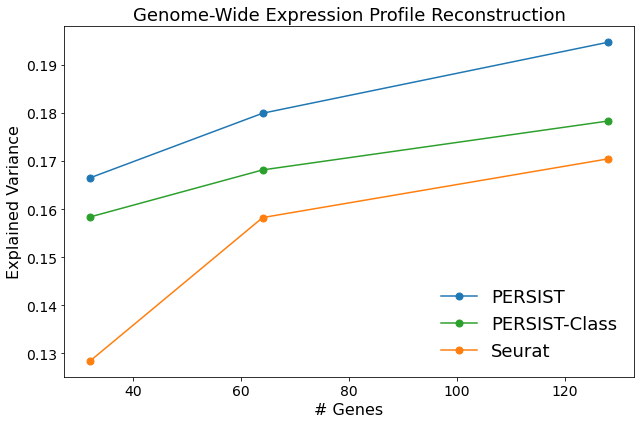

In [31]:
# Plot results
with open('reconstruction_metric.pkl', 'rb') as f:
    results = pickle.load(f)
num_features = list(results['PERSIST'].keys())

# Get total variance
total_variance = np.var(logcpm, axis=0).sum()

# Make plot
plt.figure(figsize=(9, 6))

plt.plot(num_features, [1 - results['PERSIST'][num] / total_variance for num in num_features],
         marker='o', markersize=7, color='C0', label='PERSIST')
plt.plot(num_features, [1 - results['PERSIST-Class'][num] / total_variance for num in num_features],
         marker='o', markersize=7, color='C2', label='PERSIST-Class')
plt.plot(num_features, [1 - results['Seurat'][num] / total_variance for num in num_features],
         marker='o', markersize=7, color='C1', label='Seurat')

plt.legend(loc='lower right', fontsize=18, frameon=False)
plt.tick_params(labelsize=14)
plt.title('Genome-Wide Expression Profile Reconstruction', fontsize=18)
plt.xlabel('# Genes', fontsize=16)
plt.ylabel('Explained Variance', fontsize=16)

plt.tight_layout()
plt.show()

# Cell type classification metric

Next, we use the gene panels from each method to classify cell types. As expected, PERSIST-Class offers the best performance.

In [32]:
import torch
import pickle
import matplotlib.pyplot as plt
from persist import models, Accuracy, ExpressionDataset
from torch.utils.data import DataLoader

In [33]:
# Set up datasets
train_dataset = ExpressionDataset(binary[train_inds], cell_types_98_num[train_inds])
val_dataset = ExpressionDataset(binary[val_inds], cell_types_98_num[val_inds])
test_dataset = ExpressionDataset(binary[test_inds], cell_types_98_num[test_inds])

In [34]:
# Prepare gene sets
with open('persist_results.pkl', 'rb') as f:
    persist_results = pickle.load(f)
with open('persist_class_results.pkl', 'rb') as f:
    persist_class_results = pickle.load(f)
with open('seurat_results.pkl', 'rb') as f:
    seurat_results = pickle.load(f)
num_genes = list(persist_results.keys())

# Dictionary of methods
methods = {
    'PERSIST': persist_results,
    'PERSIST-Class': persist_class_results,
    'Seurat': seurat_results
}

# Dictionary of results
results = {name: {} for name in methods}

In [35]:
# Fit models
for name in methods:
    for num in num_genes:
        # Get inds
        inds = methods[name][num]
        
        # Set up datasets
        train_dataset.set_inds(inds)
        val_dataset.set_inds(inds)
        test_dataset.set_inds(inds)
        
        # Train model
        model = models.MLP(
            input_size=num,
            output_size=train_dataset.output_size,
            hidden=[128, 128]).to(device)
        model.fit(
            train_dataset,
            val_dataset,
            mbsize=512,
            max_nepochs=500,
            loss_fn=torch.nn.CrossEntropyLoss(),
            verbose=False)

        # Validation performance
        test_acc = model.validate(DataLoader(test_dataset, batch_size=1024), Accuracy()).item()
        results[name][num] = test_acc

In [36]:
# Save results
with open('classification_metric.pkl', 'wb') as f:
    pickle.dump(results, f)

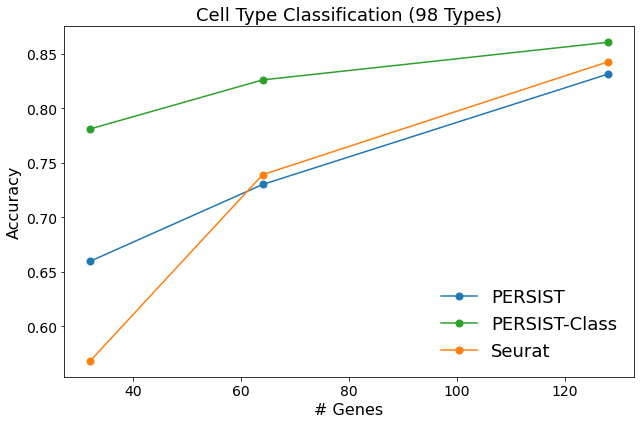

In [37]:
# Plot results
with open('classification_metric.pkl', 'rb') as f:
    results = pickle.load(f)
num_features = list(results['PERSIST'].keys())

# Make plot
plt.figure(figsize=(9, 6))

plt.plot(num_features, [results['PERSIST'][num] for num in num_features],
         marker='o', markersize=7, color='C0', label='PERSIST')
plt.plot(num_features, [results['PERSIST-Class'][num] for num in num_features],
         marker='o', markersize=7, color='C2', label='PERSIST-Class')
plt.plot(num_features, [results['Seurat'][num] for num in num_features],
         marker='o', markersize=7, color='C1', label='Seurat')

plt.legend(loc='lower right', fontsize=18, frameon=False)
plt.tick_params(labelsize=14)
plt.title('Cell Type Classification (98 Types)', fontsize=18)
plt.xlabel('# Genes', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

plt.tight_layout()
plt.show()

# Cell type classification with less granularity

Finally, we use the gene panels selected by PERSIST-Class to predict transcriptomic cell types at different levels of granularity, i.e., when we merge cell types in the transcriptomic hierarchy. It becomes easier to identify cell types when predicting either 50 or 25 cell types, rather than the original 95 types.

In [38]:
import torch
import pickle
import matplotlib.pyplot as plt
from persist import models, Accuracy, ExpressionDataset
from torch.utils.data import DataLoader

In [39]:
# Prepare gene sets
with open('persist_class_results.pkl', 'rb') as f:
    persist_class_results = pickle.load(f)
num_genes = list(persist_class_results.keys())

# Dictionary of granularities
granularities = {
    98: cell_types_98_num,
    50: cell_types_50_num,
    25: cell_types_25_num
}

# Dictionary of results
results = {num_types: {} for num_types in granularities}

In [40]:
# Fit models
for num_types in granularities:
    # Set up datasets
    train_dataset = ExpressionDataset(binary[train_inds], granularities[num_types][train_inds])
    val_dataset = ExpressionDataset(binary[val_inds], granularities[num_types][val_inds])
    test_dataset = ExpressionDataset(binary[test_inds], granularities[num_types][test_inds])
    
    for num in num_genes:
        # Get inds
        inds = methods[name][num]
        
        # Set up datasets
        train_dataset.set_inds(inds)
        val_dataset.set_inds(inds)
        test_dataset.set_inds(inds)
        
        # Train model
        model = models.MLP(
            input_size=num,
            output_size=train_dataset.output_size,
            hidden=[128, 128]).to(device)
        model.fit(
            train_dataset,
            val_dataset,
            mbsize=512,
            max_nepochs=500,
            loss_fn=torch.nn.CrossEntropyLoss(),
            verbose=False)

        # Validation performance
        test_acc = model.validate(DataLoader(test_dataset, batch_size=1024), Accuracy()).item()
        results[num_types][num] = test_acc

In [41]:
# Save results
with open('classification_granularity_metric.pkl', 'wb') as f:
    pickle.dump(results, f)

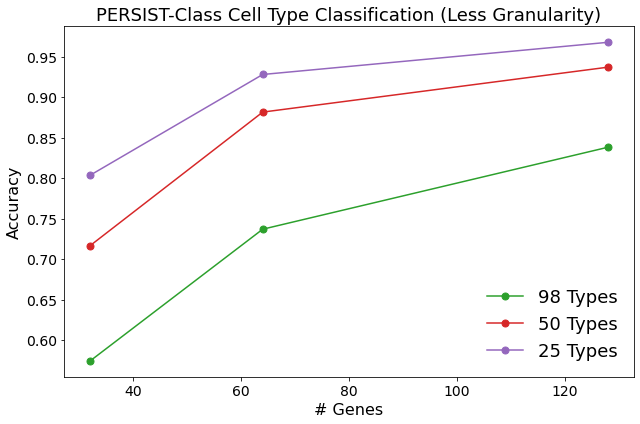

In [42]:
# Plot results
with open('classification_granularity_metric.pkl', 'rb') as f:
    results = pickle.load(f)
num_features = list(results[98].keys())

# Make plot
plt.figure(figsize=(9, 6))

plt.plot(num_features, [results[98][num] for num in num_features],
         marker='o', markersize=7, color='C2', label='98 Types')
plt.plot(num_features, [results[50][num] for num in num_features],
         marker='o', markersize=7, color='C3', label='50 Types')
plt.plot(num_features, [results[25][num] for num in num_features],
         marker='o', markersize=7, color='C4', label='25 Types')

plt.legend(loc='lower right', fontsize=18, frameon=False)
plt.tick_params(labelsize=14)
plt.title('PERSIST-Class Cell Type Classification (Less Granularity)', fontsize=18)
plt.xlabel('# Genes', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

plt.tight_layout()
plt.show()